# Tensorflow v2 per costruire una rete neurale


Mario Fiorino


Ref:

https://www.tensorflow.org/guide


https://www.tensorflow.org/guide/basics




In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

from keras import initializers
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

TensorFlow version: 2.15.0


####Un esempio semplice di architettura di rete neurale

In [ ]:

l_in = 2  # 2 segnali di ingresso
l_out = 5 # 5 nodi

sx = tf.random.normal(shape=(1,l_in), mean=4.0, stddev=1.0)
print(sx,"\n") # segnali di imput

W1 = tf.Variable( tf.random.normal((l_in, l_out), mean=1.0, stddev=0.1),name='Weight')
print(W1,"\n")
b1 = tf.Variable(tf.ones([1, l_out]))
print(b1,"\n")

comb = tf.matmul(sx, W1) # input * weight
print(comb,"\n")
y = tf.add(comb, b1) # + bias
print(y,"\n")

#activation functions
print(tf.nn.softmax(y).numpy().round(2)) # uscite dei neuroni


tf.Tensor([[2.279694  3.2052472]], shape=(1, 2), dtype=float32) 

<tf.Variable 'Weight:0' shape=(2, 5) dtype=float32, numpy=
array([[0.9841063 , 0.9804101 , 0.99050623, 1.1790799 , 0.92844033],
       [1.0198735 , 1.0048622 , 1.1197214 , 0.9504199 , 1.1197842 ]],
      dtype=float32)> 

<tf.Variable 'Variable:0' shape=(1, 5) dtype=float32, numpy=array([[1., 1., 1., 1., 1.]], dtype=float32)> 

tf.Tensor([[5.5124083 5.455867  5.847035  5.734272  5.705745 ]], shape=(1, 5), dtype=float32) 

tf.Tensor([[6.5124083 6.455867  6.847035  6.734272  6.705745 ]], shape=(1, 5), dtype=float32) 

[[0.17 0.16 0.24 0.22 0.21]]


####Proviamo a fare qualcosa di più complesso.

Costruiamo una rete neurale con TensorFlow per riconoscere le cifre scritte a mano, usando come dataset MIST (contiene migliaia di immagini di cifre scritte a mano)

Per prima cosa, importiamo il dataset:

Importiamo il dataset

In [ ]:
(xtrain,label_train),(xtest,label_test)=tf.keras.datasets.mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


Verifichiamo il contenuto

(60000, 28, 28)
60000
(60000,)

(10000,)
(10000, 28, 28)

Raw Image shape: (28, 28)

Label: 5  Label: 0  Label: 4  Label: 1  Label: 9  Label: 2  Label: 1  Label: 3  Label: 1  

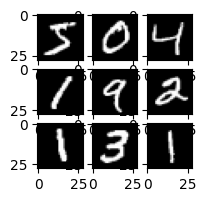

In [ ]:
print(xtrain.shape)
print(len(xtrain)) # len = 60000
print(label_train.shape) # len = 60000
print("")
print(label_test.shape)
print(xtest.shape)

print("\nRaw Image shape:",xtrain[0].shape)
print("")
plt.figure(figsize=[2, 2])
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(xtrain[i], cmap=plt.get_cmap('gray'))
    print("Label:",label_train[i], end ="  ")

plt.show()

**Data Preparation**

Per creare un modello di rete neurale multistrato efficiente per la classificazione di immagini, si è soliti applicare alcuni pre-trattamenti al dataset:

- Flatten : Le immagini, che sono matrici bidimensionali (28x28 pixel), vengono convertite in vettori unidimensionali di lunghezza 784 (cioè 28 * 28). In questo modo, ogni pixel diventa un elemento del vettore.

- Normalizzazione : I valori di scala di grigio, che normalmente vanno da 0 a 255, vengono ridimensionati tra 0 e 1. Questo facilita l'apprendimento della rete neurale.

- Codifica binaria: Le categorie di classificazione (da 1 a 9) vengono trasformate in una matrice binaria. Ad esempio, la categoria "3" diventa una matrice con 1 nella terza posizione e 0 nelle altre.

In [ ]:
num_pixels = (xtrain[0].shape[0]) * (xtrain[0].shape[0])
print(num_pixels,"\n")

# flatten 28*28 pixel images to a 784 vector
xtrain = xtrain.reshape(xtrain.shape[0], num_pixels).astype('float32')
xtest = xtest.reshape(xtest.shape[0], num_pixels).astype('float32')

# normalize inputs from 0-255 to 0-1
xtrain = xtrain / 255
xtest = xtest / 255
print(xtrain[0].shape,"\n")

# one hot encode outputs
label_train = tf.keras.utils.to_categorical(label_train) # utils is tools for creating one-hot encoding
label_test = tf.keras.utils.to_categorical(label_test)
print(label_train[0])

784 

(784,) 

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


#### Definizione dell'architettura della rete neurale

In [ ]:
# codice di riferimento
# https://medium.com/analytics-vidhya/how-to-write-a-neural-network-in-tensorflow-from-scratch-without-using-keras-e056bb143d78

class NN(object):

	def __init__(self, n_layers): # n_layers è una lista in cui sono presenti il numero di nodi per ogni layer della rete

		# Contenitore per registrare i parametri della NN
		self.params = []

		# Inizializza tutte le matrice sia dei pesi che dei bias
		#Layer1
		self.W1 = tf.Variable(tf.random.normal([n_layers[0], n_layers[1]], mean=0.0, stddev=0.1),name='W1')
	  #NOTA [n_layers[0], n_layers[1]] = (dim_input, numero_di_nodi)
		self.b1 = tf.Variable(tf.zeros([1, n_layers[1]]),name='b1')
	  #Alternativa bias
	  #self.b1 = tf.Variable(tf.random.normal([n_layers[1]], mean=0.0, stddev=0.1, dtype=tf.dtypes.float32, seed=0), name='b1')

    #Layer2
		self.W2 = tf.Variable(tf.random.normal([n_layers[1], n_layers[2]], mean=0.0, stddev=0.1),name='W2')
		self.b2 = tf.Variable(tf.zeros([1, n_layers[2]]),name='b2')

    #Layer3
		self.W3 = tf.Variable(tf.random.normal([n_layers[2], n_layers[3]], mean=0.0, stddev=0.1),name='W3')
		self.b3 = tf.Variable(tf.zeros([1, n_layers[3]]),name='b3')

		# Conserva tutti i pesi e i bias della NN in self.params
		self.params = [self.W1, self.b1, self.W2, self.b2, self.W3, self.b3]
		#print(self.params)


	def forward(self, x):
		# Costruzione della NN
		# un esempio dal dataset ->  label predetta
		Z1 = tf.matmul(x, self.W1) + self.b1 # Z1 = tf.matmul(X_tf, self.W1) + self.b1
		Z1 = tf.nn.relu(Z1)
		Z2 = tf.matmul(Z1, self.W2) + self.b2
		Z2 = tf.nn.relu(Z2)
		logit = tf.matmul(Z2, self.W3) + self.b3
		# I logit sono gli output di una rete neurale prima che venga applicata la funzione di attivazione.
		Y = tf.nn.softmax(logit)
		return Y  #Alternativa:  logit,Y

	def loss(self, y_true , l_pred):
		# Funzione di loss: cross-entropy
		# Parametri di input:
		# logits ovvero i valori predetti dalla nostra rete su cui sarà applicata la softmax fuction
		# Label, cioè i valori effettivi

		y_true_tf = tf.reshape(y_true, [1, 10])
		l_pred_tf = l_pred

		lce = tf.keras.losses.CategoricalCrossentropy(from_logits=False)(y_true_tf,l_pred_tf)
		#Potenziale alternativa manuale, da valutare = -tf.reduce_sum(y_true_tf * np.log2(l_pred_tf))
		return lce


	def backward(self, x,y):
		# Processo di "aggiustamento" dei pesi attraverso la minimizzazione della loss

		#1.
		# Create an optimizer with the desired parameters
		opt = tf.keras.optimizers.Adam(learning_rate=0.001)
		#Alternativa:
		#opt = tf.keras.optimizers.SGD(learning_rate=0.01)

    #2.
		# Compute the gradients of: "current_loss" for a list of variables given: "self.params"
		with tf.GradientTape() as tape:
				y_predicted = self.forward(x)
				current_loss = self.loss(y, y_predicted)
		gradienti = tape.gradient(current_loss, self.params)

    #3.
		#Ask the optimizer to update a list of variables, given a list of gradients.
		opt.apply_gradients(zip(gradienti, self.params))

		# https://www.tensorflow.org/api_docs/python/tf/compat/v1/train/Optimizer
		# https://www.tensorflow.org/api_docs/python/tf/keras/Optimizer

	def accuracy(self):
		c=0
		lt = len(xtest)

		for i in range(lt):
			x = tf.reshape(xtest[i], [1, -1])
			predicted_digit = tf.argmax(self.forward(x),1)
			actual_digit = tf.argmax(label_test[i])
			if predicted_digit.numpy()[0] == actual_digit.numpy():
				c = c + 1
		return ("Accuracy su tutto il test dataset :", c/lt)

#### Approfondimenti Tecnici


**Softmax function**

La funzione Softmax è una funzione che trasforma un certo vettore di $K$ valori reali in un vettore di $K$ valori reali la cui somma è 1. I valori di input possono essere positivi o negativi, ma softmax li trasforma in valori compresi tra 0 e 1 , in modo che possano essere interpretati come probabilità. Formula:

$\sigma(\textbf{z})_i = \frac{e^{z_{i}}}{\sum_{j=1}^K e^{z_{j}}} \ \ \ per \ i=1,2,\dots,K$

Dove, dato il vettore di input $\textbf{z} = (z_1, z_2, ... , z_K)$ , in uscita avremo un vettore del tipo = $(\sigma(\textbf{z})_1, \sigma(\textbf{z})_2, ...,  \sigma(\textbf{z})_K)$

$\;$

Entropia incrociata come funzione di loss: **Cross-Entropy Loss**

In termini generali la cross-entropy misura la distanza tra due distribuzioni di probabilità.

Questa è spesso usata come funzione di loss, nei problemi di classificazione per calcolare quanto sia accurato il nostro modello: definendo la differenza tra la probabilità stimata e il risultato desiderato.

Sia indicato con  ${\displaystyle t_{i}}$ la vera distribuzione di probabilità (in pratica i "true labels"), e sia ${\displaystyle q_{i}}$  la distribuzione prevista dal modello (il valore che produce in uscita la NN); sia infine $C$ il numero delle classi disponibili, formalmente si definisce:

$Loss_{CE}(t_{i}, q_{i}) = -\sum_{i}^C {t_{i} \log{q_{i}}}$

Tipicamente il $\log$ è a base $2$.

Ad esempio, in un problema di classificazione binaria, dove $C = 2$, sono presenti due classi complementari, spesso denominate classe positiva (1) e classe negativa (0). La cross-entropy loss può essere definita anche come:

$ Loss_{CE} (t_{i}, q_{i}) = -\sum_{i=1}^{2}t_{i} \log{q_{i}} = -t_{1}log(q_{1})-(1-t_{1}) log(1-q_{1})$

L’output del modello NN $q_{1}$ rappresenta la probabilità prevista che un certo evento appartenga alla classe positiva ; mentre $t_{1}$ è l'effettiva distribuzione (Nota essendo le classi complementari lo stesso discorso puo esser fatto per la classe negativa).

Per capirci meglio con un esempio pratico:

Primo campione rilevato, il modello NN dice che ha la seguente probablità di appartenere alla classe positiva : $q_{1} = 0.8$; il campione appartine alla classe postiva (la "true label"), quindi $t_{1}= 1$ ; la relativa funzione di loss vale:

$ Loss_{CE} (ClassePositiva, 0.8)= -1 \cdot \log(0.8)-(1-1) \log(1-0.8) = 0.22 $.

Secondo campione: $q_{1} = 0.3$ ; $t_{1}= 0$ ;

$ Loss_{CE} (ClassePositiva, 0.3) = 0 \cdot \log(0.3)-(1-0) \log(1-0.3) = 0.35 $.

...


Se invece si desidera distinguere tra più di due classi, cioè supponiamo che stiamo costruendo un classificatore di colori con tre classi: verde, giallo e rosso. In questo caso, $C=3$. Siano date le seguenti "true label":

verde (classe 1) è rappresento come $[1,0,0]$,

giallo(classe 2) come $[0,1,0]$,

rosso (classe 3) come $[0,0 ,1]$.

Per un certo campione, la nostra NN da in uscita: $[0.8,0.1,0.1]$, la true label associata è verde; la cross-entropy Loss:

$ Loss_{CE} ([1,0,0],[0.8,0.1,0.1]) = - ( 1 \cdot \log(0.8)+ 0 ⋅ \log(0.1) + 0 ⋅ \log(0.1)) = 0.22 $

$\;$

Si ricordi che l'obiettivo delle tecniche di ottimizzazione per le reti neurali è minimizzare la funzione di perdita (loss) su tutti gli esempi del dataset di training. Valori della loss più piccoli indicano che le previsioni dalla rete neurale si allineano meglio con le etichette reali delle classi disponibili.











$\;$

**tf.keras.losses.CategoricalCrossentropy(from_logits=False)()**

Di solito, si applica una funzione di attivazione (Sigmoid o Softmax) ai logits della rete neurale prima di calcolare la funzione di loss Cross-entropy.

Nella figura sottostante, la lettera $s$ rappresenta i logits, ossia il risultato in uscita (un vettore) della rete neurale prima dell'applicazione della funzione di attivazione $f()_i$



Utility:

https://www.v7labs.com/blog/cross-entropy-loss-guide

https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy




<div>
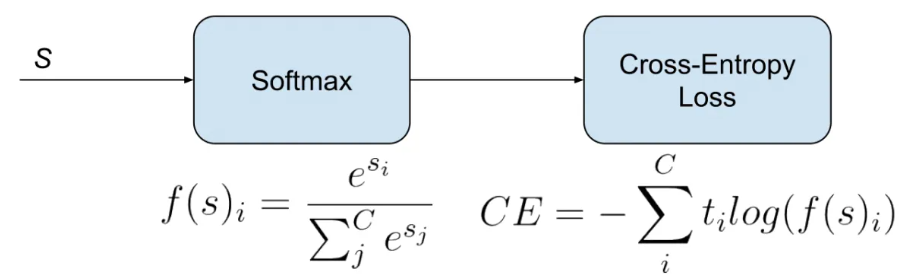
</div>

In [ ]:
y_true = [[0, 1, 0], [0, 0, 1]]
y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]

cce = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
print(cce(y_true, y_pred).numpy())

cce1 = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
print(cce1(y_true, y_pred).numpy())

cce2 = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
print(cce2(y_true, tf.nn.softmax(y_pred) ).numpy())

print("")

cce3 = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
print(cce3(y_true, tf.nn.sigmoid(y_pred) ).numpy())

0.9868951
1.1769392
0.9868951

1.0377035


**tf.GradientTape**


https://www.tensorflow.org/guide/autodiff



In [ ]:
x = tf.Variable(3.0)

with tf.GradientTape() as tape:  # Qui si prepara il set up per la differenziazione automatica (ovvero il calcolo del gradiente).
  y = x**2

dy_dx = tape.gradient(y, x)  #con l'istruzione "".gradient(target, sources)" si concretizza il calcolo del gradiente di y rispetto la variabile x
print(dy_dx.numpy())  # dy = 2x * dx

#################
print("\n---\n")
################

w = tf.Variable(tf.random.normal((3, 2)), name='w')
b = tf.Variable(tf.zeros(2, dtype=tf.float32), name='b')
x = [[1., 2., 3.]]

print("w = ",w)

with tf.GradientTape(persistent=True) as tape:
  y = x @ w + b
  print("y = ", y)
  loss = tf.reduce_mean(y**2)

[dl_dw, dl_db] = tape.gradient(loss, [w, b]) # ricaviamo le derivate parziali della funzione loss
#prima rispetto alla varaibile w e poi b
print("\ndl_dw = ",dl_dw)
print("\ndl_db = ",dl_db)
print("")
print(dl_dw.shape ==  w.shape)

6.0

---

w =  <tf.Variable 'w:0' shape=(3, 2) dtype=float32, numpy=
array([[ 0.27944678, -2.4003227 ],
       [ 0.33647862,  1.5452365 ],
       [-0.5806951 , -0.8837646 ]], dtype=float32)>
y =  tf.Tensor([[-0.7896812 -1.9611435]], shape=(1, 2), dtype=float32)

dl_dw =  tf.Tensor(
[[-0.7896812 -1.9611435]
 [-1.5793624 -3.922287 ]
 [-2.3690436 -5.8834305]], shape=(3, 2), dtype=float32)

dl_db =  tf.Tensor([-0.7896812 -1.9611435], shape=(2,), dtype=float32)

True


**Adam : Adaptive Moment Estimation**

Premessa:

La discesa del gradiente (**Gradient Descent**) è un algoritmo iterativo che consente di determinare il valore dei minimi locali di una funzione convessa e differenziabile a più variabili. Nel  machine learning è utilizzato per addestrare modelli, minimizzando la funzione di loss (riducendo cioè l'errore tra i risultati predetti e quelli effettivi).
L'idea è di sfruttare le derivata parziali (il gradiente) della funzione loss rispetto i vari parametri del modello, per poter aggiornare opportunamente il loro valore:

$p_{n+1} = p_n - lr \cdot \nabla f_{\text{Loss}} (p_n)$

Dove

$lr$ = learning rate

$p_n$ indica il valore dei parametri del modello all $n$-essimo step iterativo. Si noti, per una NN tali parametri sono rappresentati dai weights e dai bias.

Ripetendo questo aggiornamento in modo iterativo, ci si avvicina progressivamente ad un minimo locale della funzione di loss; per tanto il processo iterativo termina quando:

$\nabla f_{\text{Loss}} (p_n) = 0 $.


Maggiori info:
https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21


$\;$


**Stochastic Gradient Descent** (SGD) è una variazione del metodo Gradient Descent. Andando un pò più nello specifico, il gradient descent, spesso chiamato anche "batch gradient descent", per eseguire l'aggiornamento dei parametri del modello, calcola, ad ogni epoca o iterazione, i gradienti di tutte le funzioni loss ottenute usando tutti gli esempi contenuti nel training dataset, poi ne fa la media,  ed infine, aggiorna con il valore di questa, i parametri del modello.

SGD invece, accelera (diminuisce il tempo di calcolo) questa prassi, calcolando, ad ogni epoca, solo il gradinte della funzione di loss per un singolo esempio, spesso estratto random dal training dataset.
Si noti che in talune circostante si preferisce estrarre, non uno, ma un piccolo sottoinsieme di esempi detto "mini-batch", da questo ricavare la rispettive funzioni di loss, poi i rispettivi gradienti, farne la media, e successivamente aggiornare con questa i parametri del modello.

Ref:


https://en.wikipedia.org/wiki/Stochastic_gradient_descent


https://optimization.cbe.cornell.edu/index.php?title=Stochastic_gradient_descent

$\;$


**Adaptive Moment Estimation** è un'estenzione del metodo SGD. Nello Stochastic Gradient Descent, il tasso di apprendimento, ovvero il learning rate (che regola la dimensione degli step compiuti durante l'aggiornamento dei parametri del modello), è un valore fisso. Questo valore rimane costante durante l'intero processo di apprendimento.

Adam assegna invece un tasso di apprendimento adattivo ad ogni parametro del modello. Questi tassi vengono adattati dinamicamente durante l'allenamento in base a stime di momenti dei gradienti.

Gli autori lo descrivono così: *The method computes individual adaptive learning rates for different parameters from estimates of first and second moments of the gradients*

Grazie a questo adattamento, Adam può convergere più rapidamente verso la soluzione ottimale rispetto ad altri metodi. Svantaggi : in alcuni casi la generalizzazione delle prestazioni è peggiore di quella dell'SGD.

Ref:


https://optimization.cbe.cornell.edu/index.php?title=Adam


**Optimizers in Tensorflow**

Con il ternine Optimizer, si intente una tecnica (o algoritmo) che consente di adattare i parametri di un modello (rete neurale) in modo tale da ridurre al minimo il valore della funzione di loss. L'optimizer più semplice è la discesa del gradiente (Gradient Descent).

TensorFlow fornisce diversi optimizer predefiniti tra cui scegliere. Questo si concretizza con una Classe che implementa una specifico algoritmo (Esempio: Adam, SGD, ...).

Ref:

https://www.tensorflow.org/guide/core/optimizers_core

$\;$

**Accuracy: quanto spesso il modello produce un risultato corretto?**

Accuracy è una metrica che misura la frequenza con cui un modello prevede correttamente il risultato atteso. Si puo calcolare l'accuracy dividendo il numero di previsioni corrette per il numero totale di previsioni effettuate.

Ref:

https://developers.google.com/machine-learning/crash-course/classification/accuracy


$\;$

**Salvare e caricare i parametri del modello**

Durante e dopo il training, è possibile salvare i parametri del modello.
Questo offre due vantaggi:

1. Ripresa da dove si era interrotto: Il modello può riprendere l'addestramento da un punto precedente, evitando di dover ricominciare da zero; risparmiando così del tempo.

2. Condivisione del modello: I modelli salvati possono essere condivisi con altri, consentendo loro di ricreare il lavoro svolto e di utilizzarlo per le proprie ricerche o applicazioni.

Ref:

https://www.tensorflow.org/guide/saved_model?hl=it


https://www.tensorflow.org/guide/checkpoint





#### Training process

In [ ]:
#Parametri

#number of neurons in input layer
num_input = 784

#number of neurons in hidden layer 1
num_hidden1 = 128

#number of neurons in hidden layer 2
num_hidden2 = 64

#number of neurons in output layer
num_output = 10

n_layers = [num_input, num_hidden1, num_hidden2, num_output]


num_iterations = 5_000

In [ ]:
rg = NN(n_layers)

for i in range(num_iterations+1):

    #Pesca random x  e y dal training_dataset
    ri = np.random.randint(low=0, high=len(xtrain))
    x = xtrain[ri]
    x = tf.reshape(x, [1, -1])
    y = label_train[ri]
    rg.backward(x,y)

    if (i > 0) and ( (i % (num_iterations/5)) == 0) :
       print("\nEpoca:",i)
       y_pred = rg.forward(x)
       print("Loss:", rg.loss(y,y_pred))

print("\nFine del training")
#print(rg.params)

# Salva i parametri del modello
checkpoint = tf.train.Checkpoint(var_list=rg.params)
save=checkpoint.save('./training_checkpoints1')

print("\nModello salvato ")


Epoca: 1000
Loss: tf.Tensor(0.13689, shape=(), dtype=float32)

Epoca: 2000
Loss: tf.Tensor(0.013412074, shape=(), dtype=float32)

Epoca: 3000
Loss: tf.Tensor(0.11908475, shape=(), dtype=float32)

Epoca: 4000
Loss: tf.Tensor(1.192093e-07, shape=(), dtype=float32)

Epoca: 5000
Loss: tf.Tensor(1.192093e-07, shape=(), dtype=float32)

Fine del training

Modello salvato 


####Verifica il funzionamento di tf.train.load_checkpoint

In [ ]:
#carica e vedi il contenuto
reader= tf.train.load_checkpoint(save)

shape_from_key = reader.get_variable_to_shape_map()
dtype_from_key = reader.get_variable_to_dtype_map()

#print(dtype_from_key)
sorted(shape_from_key.keys())

#Nota
#in Colab i file sono scaricabili dall'icona a sinistra a forma di cartella, chiamata File

['_CHECKPOINTABLE_OBJECT_GRAPH',
 'save_counter/.ATTRIBUTES/VARIABLE_VALUE',
 'var_list/0/.ATTRIBUTES/VARIABLE_VALUE',
 'var_list/1/.ATTRIBUTES/VARIABLE_VALUE',
 'var_list/2/.ATTRIBUTES/VARIABLE_VALUE',
 'var_list/3/.ATTRIBUTES/VARIABLE_VALUE',
 'var_list/4/.ATTRIBUTES/VARIABLE_VALUE',
 'var_list/5/.ATTRIBUTES/VARIABLE_VALUE']

In [ ]:
#verifica il contenuto
ke = 'var_list/1/.ATTRIBUTES/VARIABLE_VALUE'
f = reader.get_tensor(ke)

x = tf.Variable(f,dtype=tf.dtypes.float32, name='b1')
#print(x)
#print(rg.params[1])

print(rg.params[1] == x)
print(type(rg.params[1]) == type(x))

tf.Tensor(
[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True]], shape=(1, 128), dtype=bool)
True


In [ ]:
#Istanzia una nuova rete neurale
rk = NN(n_layers)

#iserisci i parametri salvati in checkpoint
rk.W1.assign( (reader.get_tensor('var_list/0/.ATTRIBUTES/VARIABLE_VALUE') ) )
rk.b1.assign( (reader.get_tensor('var_list/1/.ATTRIBUTES/VARIABLE_VALUE') ) )

rk.W2.assign( (reader.get_tensor('var_list/2/.ATTRIBUTES/VARIABLE_VALUE') ) )
rk.b2.assign( (reader.get_tensor('var_list/3/.ATTRIBUTES/VARIABLE_VALUE') ) )

rk.W3.assign( (reader.get_tensor('var_list/4/.ATTRIBUTES/VARIABLE_VALUE') ) )
rk.b3.assign( (reader.get_tensor('var_list/5/.ATTRIBUTES/VARIABLE_VALUE') ) )
#Per maggiori info su tf.Variable.assign() https://www.tensorflow.org/guide/variable?hl=it

#Nota
# usando l'istruzione sottostante da errore nella fase di training : ValueError: No gradients provided for any variable:
#rk.b2 = tf.Variable(reader.get_tensor('var_list/3/.ATTRIBUTES/VARIABLE_VALUE'),dtype=tf.dtypes.float32,name='b2')

#Verifica che il risultato è corretto conforntando le due reti
for i in range(3):
    #Pesca random x  e y dal training_dataset
    ri = np.random.randint(low=0, high=len(xtest))
    x = xtest[ri]
    x = tf.reshape(x, [1, -1])
    y = label_test[ri]
    print("")
    print(rk.forward(x) == rg.forward(x))



tf.Tensor([[ True  True  True  True  True  True  True  True  True  True]], shape=(1, 10), dtype=bool)

tf.Tensor([[ True  True  True  True  True  True  True  True  True  True]], shape=(1, 10), dtype=bool)

tf.Tensor([[ True  True  True  True  True  True  True  True  True  True]], shape=(1, 10), dtype=bool)


In [ ]:
#Proseguiamo il processo di training con nuovi step, partendo dagli ultimi dati salvati in checkpoint

for i in range(2000):
    #Pesca random x  e y dal training_dataset
    ri = np.random.randint(low=0, high=len(xtrain))
    x = xtrain[ri]
    x = tf.reshape(x, [1, -1])
    y = label_train[ri]
    rk.backward(x,y)

In [ ]:
#Verifica
ri = np.random.randint(low=0, high=len(xtest))
x = xtest[ri]
x = tf.reshape(x, [1, -1])
y = label_test[ri]

print(rk.forward(x) == rg.forward(x))
print("")
print("True label: ", y)
print("MORE TRAIN:", rk.forward(x).numpy().round(2))
print("LESS TRAIN:", rg.forward(x).numpy().round(2)) # questa è una rete addestrata con sole 300 iterazioni

tf.Tensor([[False False False False False False False False False False]], shape=(1, 10), dtype=bool)

True label:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
MORE TRAIN: [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
LESS TRAIN: [[0.16 0.09 0.01 0.04 0.02 0.06 0.29 0.21 0.06 0.05]]


####Testiamo il lavoro NN ottenuta

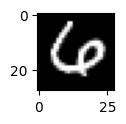

TrueLabel:   [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Previsione:  [[0.01 0.   0.04 0.   0.   0.   0.95 0.   0.   0.  ]]


In [ ]:
ri = np.random.randint(low=0, high=len(xtest))

x = xtest[ri]

xf = x.reshape(28, 28)
plt.figure(figsize=[1, 1])
plt.imshow(xf, cmap=plt.get_cmap('gray'))
plt.show()

x = tf.reshape(x, [1, -1])
y = label_test[ri]
yy = rg.forward(x)
print("TrueLabel:  ",y)
print("Previsione: ",yy.numpy().round(2))


In [ ]:
rg.accuracy()

('Accuracy su tutto il test dataset :', 0.8325)